In [1]:
import numpy as np
import cv2
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import tkinter
from tkinter import filedialog
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [2]:
path3=filedialog.askdirectory(title="Blue Nuclei")

In [26]:
path1 = filedialog.askdirectory(title="Main Images")
path2=filedialog.askdirectory(title="Images to store")

#path4=filedialog.askdirectory()

In [27]:
path1

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched'

In [28]:
path2

'/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/17_May_2024/Same_section'

In [29]:
files=[x for x in sorted(glob(path1+"/*/*20x*.jpg"))] # Individual Patient's data (may contain multiple images)
#masks=["mask"+str(x) for x in range(len(files)-1)]
no_duplicates=False

In [30]:
st1=set(([x.split("/")[len(x.split("/"))-2] for x in files])) # Using set theory to segregate 
                                                                #actual number of patients
#st1=sorted(list(st1))

In [31]:
st2=set(([x.split("/")[len(x.split("/"))-2] for x in files])) # Using set theory to segregate 
                                                                #actual number of patients
#st2=sorted(list(st1))

In [32]:
st2-st1

set()

In [33]:
img_list1=sorted(glob(path1+"/*"))
img_list3=sorted(glob(path3+"/*"))
print(path2)
print(len(img_list1))
print(len(img_list3))
if(len(img_list1)==len(img_list3)):
    print("*******ALL GOOD*******")
else:
    print("Check for file size")

/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Cell Counts/onco_sg_trial/17_May_2024/Same_section
204
204
*******ALL GOOD*******


In [34]:
len(st2)

204

In [35]:
img_list1[0:10]

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched/A006',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched/A008',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched/A012',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched/A015',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched/A016',
 '/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/17_May_2024/Same section/Stitched/A017',
 '/media/saab/f7ee81f1-4052-

In [36]:
l1=[] #Patient name
l2=[] #Image type
l3=[] #All nuclei
l4=[] #cd3p nuclei
for x in sorted(st1): #For loop for each patient
    print(x,end=" ")
    os.makedirs(path2+"/"+x+"/",exist_ok=True)
    y=sorted(glob(path1+"/"+x+"/*20x*.jpg"))#Get all image paths per patient
    y1=sorted(glob(path3+"/"+x+"/*20x*.jpg.npy"))#Get all image paths per patient 
    print(len(y))
    for z in range(len(y)): #Read indivdiual image path
        
        #print((y[z]))
        #print((y1[z]))
           
        img=cv2.imread(y[z]) #Read H&E overlapped image
        bn=np.load(y1[z]) #Read blue nuclei
        img=cv2.resize(img,(bn.shape[1],bn.shape[0]))
        #print(y)
        b,g,r=cv2.split(img) #Get red channel
        ret,thresh1 = cv2.threshold(r,35,255,cv2.THRESH_BINARY) #Threshold


        pred=bn*np.logical_and(bn,thresh1)
        v1,c1=np.unique(bn,return_counts=True)
        v2,c2=np.unique(pred,return_counts=True)
        np.save(path2+"/"+x+"/"+y[z].split("/")[-1],pred)
        l1.append(x)
        l2.append(y[z].split("/")[-1].split(",")[1])
        l3.append(len(v1))
        l4.append(len(v2))
df=pd.DataFrame({'Patient name': l1,'Image Type':l2,'All nuclei':l3,'CD3+ Nuclei':l4})
path4=filedialog.askdirectory(title='path for csv')
df.to_csv(path4+"/onco_sg_same.csv",index=False)
            #print(" ")
        

A006 1
A008 1
A012 1
A015 1
A016 1
A017 1
A021 1
A025 1
A027 1
A028 1
A033 1
A037 1
A062 1
A063 1
A066 1
A068 1
A071 1
A072 1
A073 1
A074 1
A100 1
A101 1
A102 1
A103 1
A104 1
A109 1
A110 1
A111 1
A112 1
A114 1
A117 1
A120 1
A122 1
A124 1
A126 1
A130 1
A131 1
A134 1
A136 1
A138 1
A139 1
A143 1
A144 1
A146 1
A147 1
A148 1
A149 1
A150 1
A152 1
A153 1
A155 1
A156 1
A157 1
A158 1
A159 1
A162 1
A163 1
A165 1
A167 1
A168 1
A169 1
A177 1
A182 1
A183 1
A184 2
A185 1
A186 2
A187 3
A188 1
A190 1
A191 1
A192 1
A193 2
A194 1
A195 1
A196 1
A197 1
A198 1
A199 1
A200 2
A201 1
A202 1
A204 3
A205 1
A206 3
A207 1
A208 2
A209 2
A210 1
A211 1
A212 3
A213 1
A214 1
A215 1
A216 2
A217 1
A218 1
A219 1
A220 1
A221 2
A222 1
A228 1
A229 1
A230 3
A232 1
A233 1
A234 1
A239 1
A240 1
A241 1
A243 1
A247 1
A249 1
A250 1
A252 1
A255 1
A258 1
A260 1
A261 1
A262 1
A263 1
A264 1
A265 1
A266 1
A267 1
A268 1
A269 1
A270 1
A271 1
A272 1
A273 1
A275 1
A276 1
A278 1
A279 1
A280 1
A281 1
A282 1
A283 1
A284 1
A285 1
A295 1
A302 1

In [14]:
y

['/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/SGH_IMCB_NTU_Main/Processed_Data/Predicted_CD3P_Regions/onco_sg_trial/15_May_2024/Stitched/A062/A062, acinar, 20x.jpg']

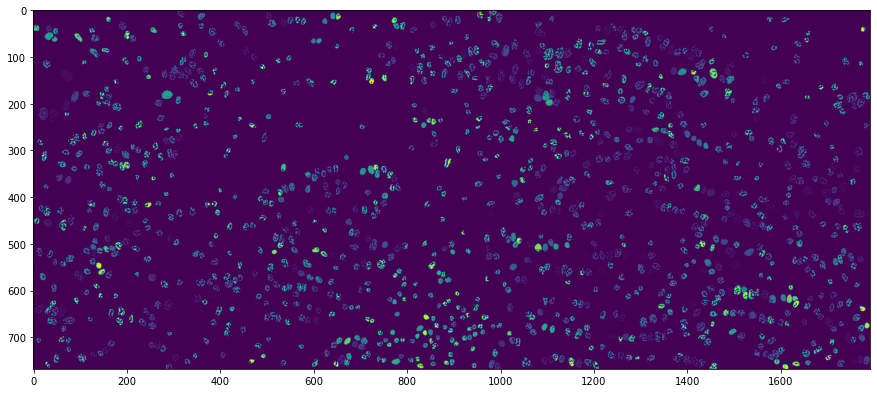

In [57]:
plt.figure(figsize=(15,15))
plt.imshow(pred)

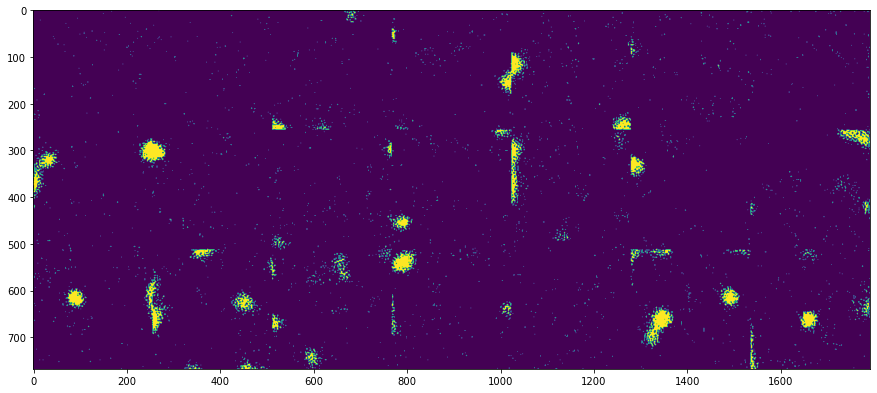

In [77]:
plt.figure(figsize=(15,15))
ret,thresh1 = cv2.threshold(r,35,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)